In [108]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random 


In [109]:
np.random.seed(0)

In [110]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# the data, shuffled and split between tran and test sets


In [111]:
print(X_train.shape)
print(y_train.shape)
#large dataset reduces overfitting
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


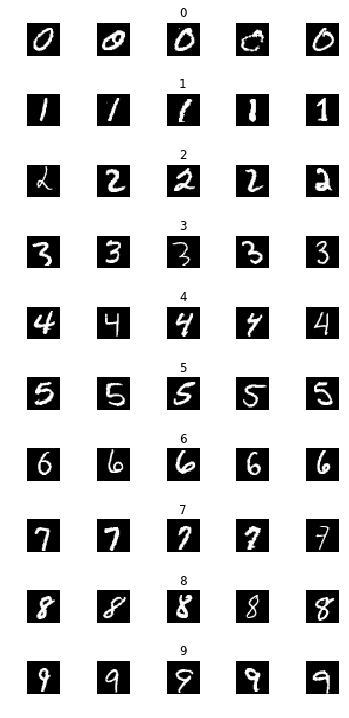

In [112]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not equal to number of labels"

assert(X_test.shape[0]==y_test.shape[0]), "The number of images is not equal to number of labels"

assert(X_train.shape[1:]==(28,28)), "Wrong Dimensions" #dimensions not 28 by 28
#from index 1 till last index 
assert(X_test.shape[1:]==(28,28)), "Wrong Dimensions"

num_of_samples = []

cols = 5

num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
    
    for j in range(num_classes):
        #Iterating through row, or single instance of number
    
        x_selected = X_train[y_train == j]
        #stores all iterations of same number into this variable
        
        #chose random image and show
        #axs object
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        #leave remainding arguements
        axs[j][i].axis("off")
        
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
            

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Num of images')

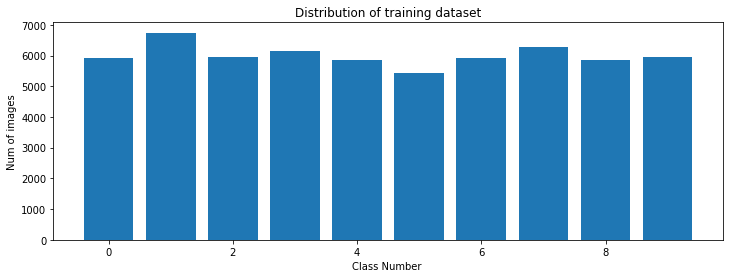

In [113]:
print(num_of_samples)
#number of images belonging to each class

plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class Number ")
plt.ylabel("Num of images")

In [114]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
#one hot encoded training data and testing data


In [115]:
X_train = X_train/255
X_test = X_test/255
#Normalisation 
#contains 60,000 grey scale images, 0-255 pixel value.
#maximum value of pixel intensity is therefore 1. 
#decreases variance among data, low variance, neural network deals with data better



In [116]:
#flatten
#so we can do matrix multiplication
#28 by 28
num_pixels = 784 
X_train = X_train.reshape(X_train.shape[0], num_pixels)
#2d array of 60,000 with each input being a 784 array
#print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)



In [117]:
def create_model():
    model = Sequential()
    model.add(Dense(10,input_dim=num_pixels, activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    #num hidden layers
    #deeper layer greater combination
    #too much leads to overfitting, vice versa, leads to underfitting
    #softmax => convert scores to probability
    
    

In [118]:
model = create_model()
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_17 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [119]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size = 200, verbose = 1, shuffle = 1)
#checks prediction mathces label
#valid_split. Split training data into training set and validation set so 0.1 goes into validation


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.6334 - acc: 0.8055 - val_loss: 0.3145 - val_acc: 0.9077
Epoch 2/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.3825 - acc: 0.8905 - val_loss: 0.2810 - val_acc: 0.9168
Epoch 3/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.3376 - acc: 0.9018 - val_loss: 0.2673 - val_acc: 0.9198
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3259 - acc: 0.9038 - val_loss: 0.2644 - val_acc: 0.9190
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3109 - acc: 0.9079 - val_loss: 0.2715 - val_acc: 0.9188
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3020 - acc: 0.9105 - val_loss: 0.2584 - val_acc: 0.9238
Epoch 7/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2924 - acc: 0.9125 - val_loss: 0.2642 - val_acc:

Text(0.5, 0, 'epoch')

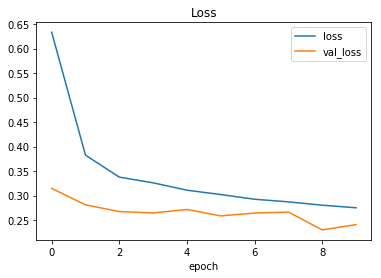

In [120]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

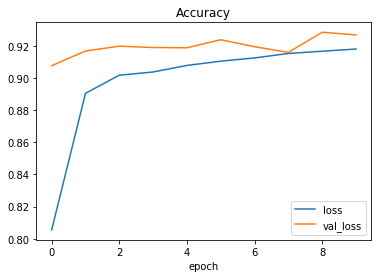

In [121]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['loss', 'val_loss'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [122]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score: ', score[0])
print('Test accuracy: ', score[1])


<class 'list'>
Test score:  0.302713608622551
Test accuracy:  0.9114


<Response [200]>


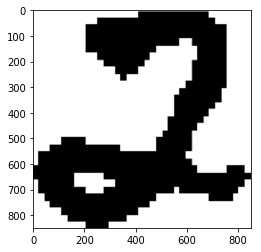

In [123]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

(850, 850, 4)


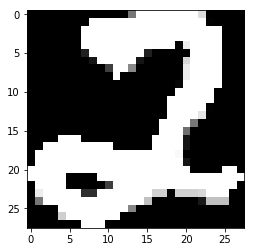

In [124]:
import cv2 
img_array = np.asarray(img)
print(img_array.shape) # 850 by 850
#resize to 28 by 28

resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))



In [125]:
image = image/255
image = image.reshape(1, 784)


In [126]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

predicted digit: [2]
